In [1]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#Classifiers
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('basededatos (1).xlsx')
data

,Tipo de cita,edad,sexo,aseguradora tipo,Numero DX,Hosp. Reciente,Numero de MX,hora,día cita,mes cita,intervalo creación - asignación,Asistencias previas,Inasistencias previas
0,1,64,0,3,2,0,2,17,3,1,36,6,0
1,1,63,1,3,5,0,0,13,5,6,125,2,0
2,1,77,1,1,2,0,0,7,4,6,33,3,0
3,1,25,1,3,1,0,0,14,6,7,46,3,5
4,1,50,0,3,1,0,0,10,0,9,30,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,0,64,1,1,1,0,0,10,4,9,14,5,0
12864,0,23,1,3,1,0,1,10,4,9,43,3,4
12865,0,25,1,3,1,0,0,11,4,9,43,4,1
12866,0,31,1,3,2,0,3,12,4,9,11,5,7


In [3]:
x = data.drop('Tipo de cita', axis=1)  # Ajusta 'etiqueta' al nombre de la columna de etiquetas
y = data['Tipo de cita']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [5]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes, binary= True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [6]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
        print('recall: {0:.4f}'.format(recall))
        print('f1_score: {0:.4f}'.format(f1))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [7]:
#classes
classes = [0, 1]

In [8]:
#classifiers
adaboost= AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha= 0.0, criterion= "entropy", max_depth= 30, max_features= "sqrt", min_impurity_decrease=0.0 ,min_samples_leaf=2, min_samples_split=5, splitter="best"), n_estimators=200, random_state=42, algorithm="SAMME.R", learning_rate=0.01)
random_forest= RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=2)
bagging= BaggingClassifier(n_estimators= 200, max_samples=0.7, max_features=0.5, bootstrap= False,base_estimator=RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=30, min_samples_split=2, min_samples_leaf=2, max_features=2))

In [9]:
classifiers=[
#MAYOR NUMERO DE ACIERTOS
              VotingClassifier(estimators=[('AdaBoost', adaboost),
                                                  ('RandomForest', random_forest),
                                                    ('Bagging', bagging)],
                                      voting='soft')

]

names=['BESTACT-SOFT']

Train runtime: 1287.472543001175
Test runtime: 514.2311613559723


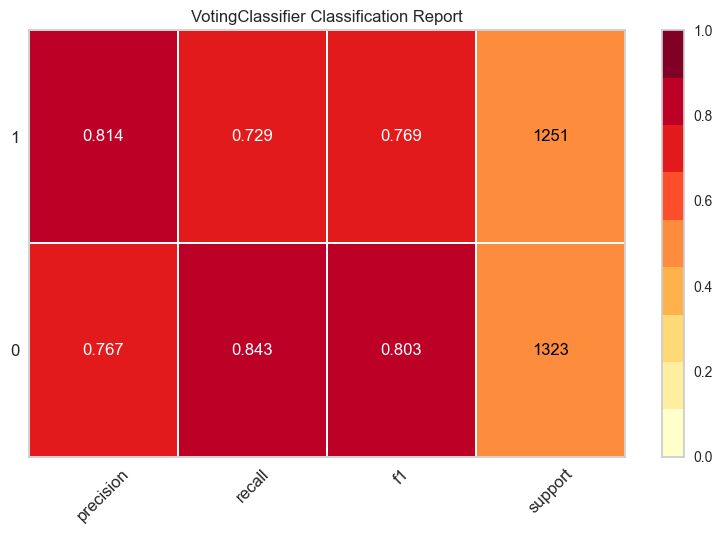

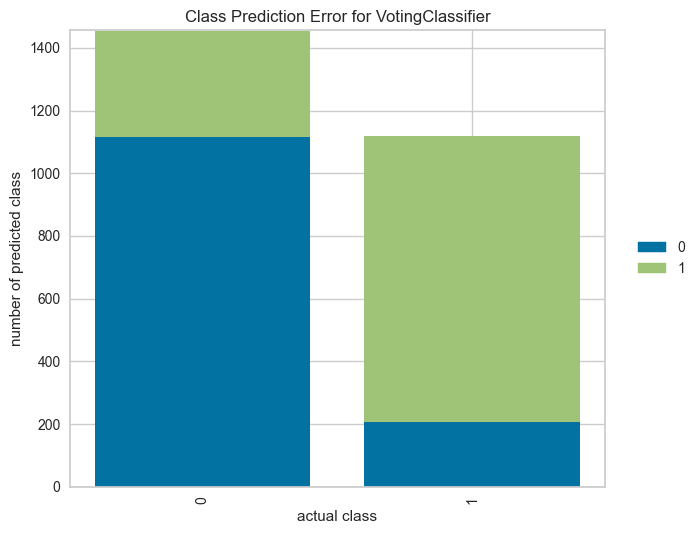

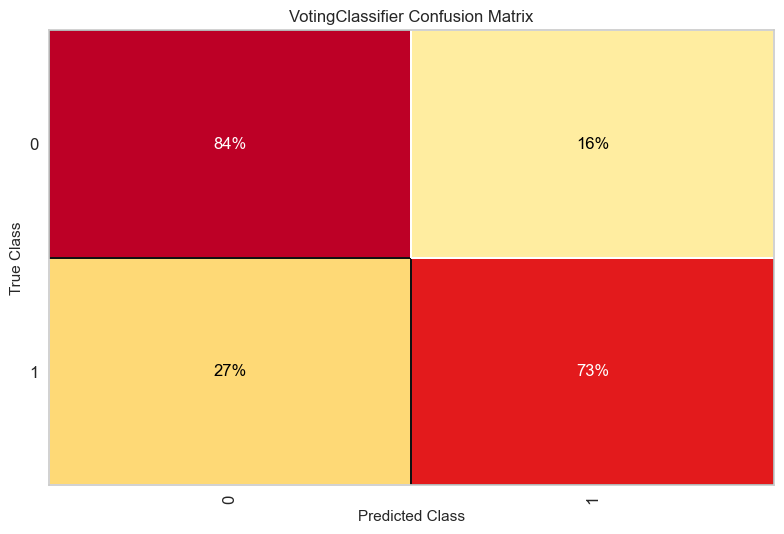

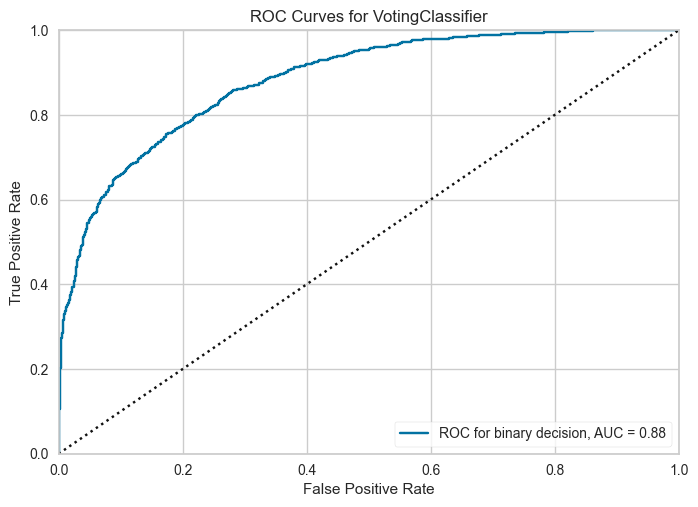

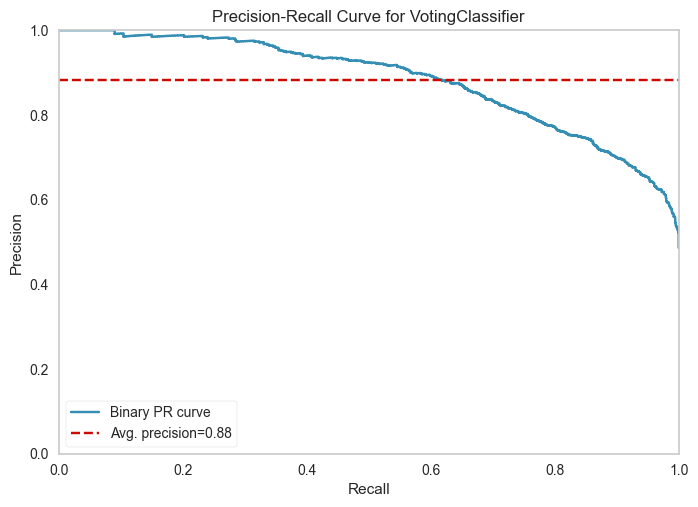

In [10]:
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [11]:
classifier_metrics()

VotingClassifier(estimators=[('AdaBoost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                  max_depth=30,
                                                                                  max_features='sqrt',
                                                                                  min_samples_leaf=2,
                                                                                  min_samples_split=5),
                                                 learning_rate=0.01,
                                                 n_estimators=200,
                                                 random_state=42)),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=30,
                                                     max_features=2,
                                                     min_samples